In [0]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from urllib.request import urlopen
import seaborn as sns
import urllib.request
import io
%matplotlib inline

In [0]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WGRzWShJw47dpIuR9imRLvv5bN21e1lm' -O image.jpg

--2020-03-18 16:27:42--  https://docs.google.com/uc?export=download&id=1WGRzWShJw47dpIuR9imRLvv5bN21e1lm
Resolving docs.google.com (docs.google.com)... 108.177.111.138, 108.177.111.101, 108.177.111.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pmh892i983j20uil6kgv3o7pp7t9gp66/1584548850000/07265221586689430228/*/1WGRzWShJw47dpIuR9imRLvv5bN21e1lm?e=download [following]
--2020-03-18 16:27:43--  https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pmh892i983j20uil6kgv3o7pp7t9gp66/1584548850000/07265221586689430228/*/1WGRzWShJw47dpIuR9imRLvv5bN21e1lm?e=download
Resolving doc-08-2s-docs.googleusercontent.com (doc-08-2s-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to doc-08-2s-docs.googleusercontent.com (doc-08

In [0]:
ny_file = '/content/image.jpg'

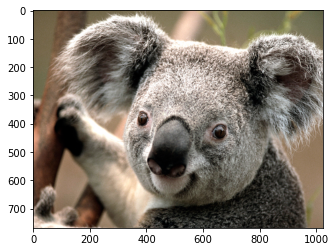

In [0]:
img = Image.open(ny_file)
plt.imshow(img)

In [0]:
img.size

(1024, 768)

In [0]:
def reconstructed_image(img, k):
  im_r = img[:,:,0]
  im_g = img[:,:,1]
  im_b = img[:,:,2]
  u_r, s_r, v_r = np.linalg.svd(im_r)
  u_b, s_b, v_b = np.linalg.svd(im_g)
  u_g, s_g, v_g = np.linalg.svd(im_b)
  i_r = np.dot(np.dot(np.array(u_r[:, :k]), np.diag(s_r[:k])), np.array(v_r[:k, :]))
  i_b = np.dot(np.dot(np.array(u_b[:, :k]), np.diag(s_b[:k])), np.array(v_b[:k, :]))
  i_g = np.dot(np.dot(np.array(u_g[:, :k]), np.diag(s_g[:k])), np.array(v_g[:k, :]))

  final = np.stack([i_r, i_b, i_g], axis=2)
  return final.astype('uint8')

**Image Reconstructed using 1 Singular Vector**


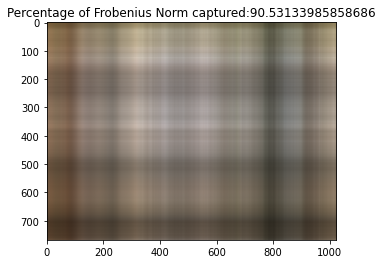

In [0]:
initial = np.linalg.norm(np.array(img))

image = reconstructed_image(np.array(img), 1)
plt.title("Percentage of Frobenius Norm captured:" + str(100*np.linalg.norm(image)/initial))
plt.imshow(image)
plt.show()

**Image Reconstructed using 2 Singular Vectors**

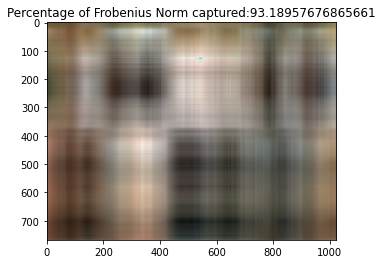

In [0]:
initial = np.linalg.norm(np.array(img))

image = reconstructed_image(np.array(img), 2)
plt.title("Percentage of Frobenius Norm captured:" + str(100*np.linalg.norm(image)/initial))
plt.imshow(image)
plt.show()

**Image Reconstructed using 4 Singular Vectors**

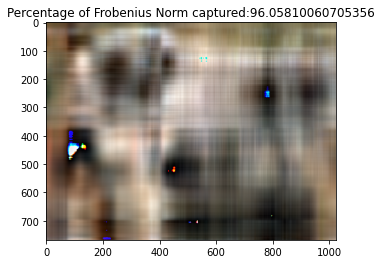

In [0]:
initial = np.linalg.norm(np.array(img))

image = reconstructed_image(np.array(img), 4)
plt.title("Percentage of Frobenius Norm captured:" + str(100*np.linalg.norm(image)/initial))
plt.imshow(image)
plt.show()

**Image Reconstructed using 16 Singular Vectors**

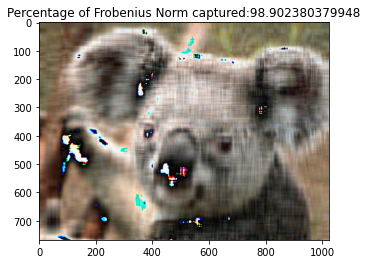

In [0]:
initial = np.linalg.norm(np.array(img))

image = reconstructed_image(np.array(img), 16)
plt.title("Percentage of Frobenius Norm captured:" + str(100*np.linalg.norm(image)/initial))
plt.imshow(image)
plt.show()

The quality of image increases as the number of singular vectors are increased.